In [13]:
# Connor Lewis - CSL735
# Michael Spearin - MSS3627
# Data Science Lab - Lab 4
# Due February 14, 2017

import numpy as np
import matplotlib.pyplot as plt
import scipy
import sympy as sym
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

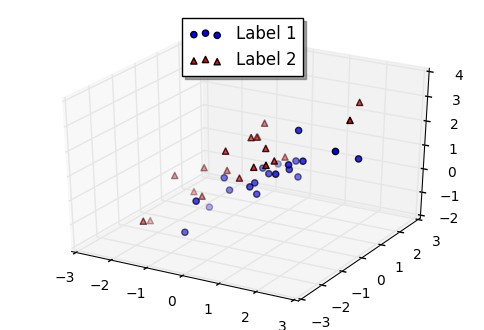

In [2]:
# Problem 1 - Linear Discriminant Analysis
# Question 1
n = 20
d = 3
mean1 = [0,0,0]
cov1 = [[1, 0.9, 0.9], [0.9, 1, 0.9], [0.9, 0.9, 1]]
data1 = np.random.multivariate_normal(mean1, cov1, n)

mean2 = [0, 0, 1]
cov2 = [[1, 0.8, 0.8], [0.8, 1, 0.8], [0.8, 0.8, 1]]
data2 = np.random.multivariate_normal(mean2, cov2, n)

sample_data = [data1, data2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data1[:,0], data1[:,1], data1[:,2], c = 'b', marker='o', label = "Label 1")
ax.scatter(data2[:,0], data2[:,1], data2[:,2], c = 'r', marker='^', label = "Label 2")
legend = ax.legend(loc = 'upper center', shadow = True)
plt.show()

[[ 0.0883979  -0.02359617 -0.05583062]
 [-0.02359617  0.14226835 -0.0911387 ]
 [-0.05583062 -0.0911387   0.14528483]]
3
[[ 0.06773847]
 [ 0.12832633]
 [-0.17730653]]


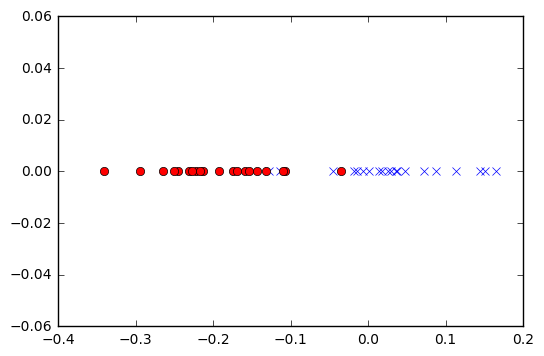

In [47]:
# Problem 1 - Linear Discriminant Analysis
# Question 2: LDA using Fisher's Linear Discriminant
#http://www.csd.uwo.ca/~olga/Courses/CS434a_541a/Lecture8.pdf
mean1 = np.matrix(np.mean(data1, axis = 0))
mean2 = np.matrix(np.mean(data2, axis = 0))
s_1 = len(data1) * np.cov(data1, rowvar = False)
s_2 = len(data2) * np.cov(data2, rowvar = False)
s_w = s_1 + s_2
print(scipy.linalg.inv(s_w))
print(np.linalg.matrix_rank(s_w)) # full rank so can use s_w^-1 * (mean1 - mean2)
mean_diff = mean1 - mean2
w = scipy.linalg.inv(s_w) * np.transpose(mean_diff)
print(w)
new_data1 = np.transpose(w) * np.transpose(data1)
new_data2 = np.transpose(w) * np.transpose(data2)
new_sampledata = [new_data1, new_data2]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(new_data1, np.zeros(new_data1.shape[0]), c='b', marker='x')
ax.plot(new_data2, np.zeros(new_data2.shape[0]), c='r', marker='o')
plt.show()

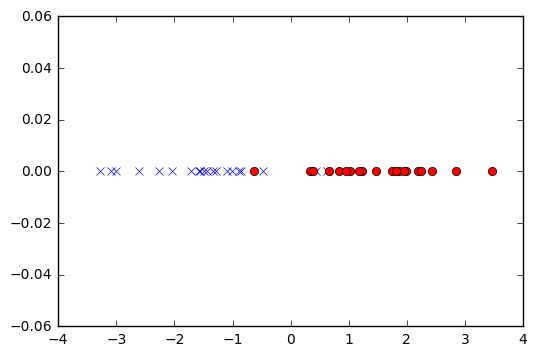

In [58]:
# Problem 1 - Linear Discriminant Analysis
    # Question 3
lda = LDA(n_components=1)
x = np.zeros(20)
z = np.ones(20)
y = np.hstack((x,z))

transform = lda.fit_transform(np.vstack(sample_data), y)
lda_data1 = transform[:20]
lda_data2 = transform[20:]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(lda_data1, x, c='b', marker='x', linestyle = '')
ax.plot(lda_data2, x, c='r', marker='o', linestyle = '') 
plt.show()

w_lda = lda.coef_
w_lda = w_lda.T

In [54]:
print("LDA using scipy:\n", w_lda)
print("LDA using linear algebra:\n", w)

LDA using scipy:
 [[-2.70953878]
 [-5.1330531 ]
 [ 7.09226126]]
LDA using linear algebra:
 [[ 0.06773847]
 [ 0.12832633]
 [-0.17730653]]


In [19]:
# Problem 2 - Using Low Rank Structure for Corrupted Entries
corrMat1 = pd.DataFrame(pd.read_csv('./input/CorrMat1.csv', header=None))
corrMat2 = pd.DataFrame(pd.read_csv('./input/CorrMat3.csv', header=None))
corrMat1_No_Error = pd.DataFrame(pd.read_csv('./input/CorrMat3_No_Error.csv', header = None))
errorVal = 9999

def printScatters(matrix):
    r = range(len(matrix.iloc[:,0]))
    for col in r:
        plt.scatter(r, corrMat2.iloc[:,col])
        plt.show()

def rankAnalysis(matrix):
    print("The RANK of the matrix is: " + str(sym.Matrix(matrix).rank()))
    print("The RREF of the matrix is: ")
    print(sym.Matrix(matrix).rref())
        
# Analysing corrMat1
#printScatters(corrMat1)
#rankAnalysis(corrMat1)
#rankAnalysis(corrMat1_No_Error)

r = range(len(corrMat1.iloc[:,0]))
errorsFixed = 0
for row in r:
    for col in r:
        if(corrMat1.iloc[row,col] == errorVal):
            corrMat1.iloc[row,col] = corrMat1.iloc[19,col] *(corrMat1.iloc[row,19] / corrMat1.iloc[19,19])
            print("FIXED: " + str(row) + "," + str(col) + " with " + str(corrMat1.iloc[row,col]))
            errorsFixed += 1
print("ERRORS FIXED: " + str(errorsFixed))
    
    
# Analyzing corrMat3        
#printScatters(corrMat3)
#rankAnalysis(corrMat3)
r = range(len(corrMat2.iloc[:,0]))
errorsFound = 0
errorsFixed = 0
for row in r:
    for col in range(row + 1):
        if(corrMat2.iloc[row,col] != corrMat2.iloc[col,row]):
            errorsFound += 1
            if(corrMat2.iloc[row,col] == errorVal):
                if(corrMat2.iloc[col,row] == errorVal):
                    print("ERROR: " + str(col) + "," + str(row) + " both values corrupted.")
                else:
                    corrMat2.iloc[row,col] = corrMat2.iloc[col,row]
                    errorsFixed += 1
                    print("FIXED: " + str(row) + "," + str(col) + " replaced.")
            else:
                corrMat2.iloc[col,row] = corrMat2.iloc[row,col]
                errorsFixed += 1
                print("FIXED: " + str(col) + "," + str(row) + " replaced.")
                
            print("(" + str(row) + ", " + str(col) + ")")
print("Total Errors Found: " + str(errorsFound))
print("Total Errots Fixed: " + str(errorsFixed))

FIXED: 8,0 with 2891.0
FIXED: 8,3 with 3675.0
FIXED: 8,23 with 3136.0
FIXED: 8,24 with 4655.0
FIXED: 8,60 with 3234.0
FIXED: 8,61 with 3234.0
FIXED: 8,69 with 3920.0
FIXED: 8,78 with 3920.0
FIXED: 8,85 with 2499.0
FIXED: 8,96 with 1274.0
FIXED: 12,0 with 4897.0
FIXED: 12,3 with 6225.0
FIXED: 12,13 with 6972.0
FIXED: 12,27 with 6723.0
FIXED: 12,30 with 6557.0
FIXED: 12,43 with 7968.0
FIXED: 12,45 with 913.0
FIXED: 12,59 with 913.0
FIXED: 12,84 with 913.0
FIXED: 12,87 with 0.0
FIXED: 14,0 with 3304.0
FIXED: 14,3 with 4200.0
FIXED: 14,13 with 4704.0
FIXED: 14,27 with 4536.0
FIXED: 14,30 with 4424.0
FIXED: 14,43 with 5376.0
FIXED: 14,45 with 616.0
FIXED: 14,59 with 616.0
FIXED: 14,84 with 616.0
FIXED: 14,87 with 0.0
FIXED: 15,0 with 4956.0
FIXED: 15,3 with 6300.0
FIXED: 15,13 with 7056.0
FIXED: 15,27 with 6804.0
FIXED: 15,30 with 6636.0
FIXED: 15,43 with 8064.0
FIXED: 15,45 with 924.0
FIXED: 15,59 with 924.0
FIXED: 15,84 with 924.0
FIXED: 15,87 with 0.0
FIXED: 22,1 with 2829.0
FIXED: 22,6 

In [ ]:
# Problem 3 - Getting More into Kaggle